# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import random as rnd

### Wczytanie danych

Poniższy kod wczytuje do zmiennej `eruptions_data` dane z przygotowanego wcześniej pliku eruptions_data.pkl.
Wyświetl przygotowaną tablicę.

In [3]:
eruptions_data = pd.read_pickle("eruption_data.pkl")
eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,5.0,-9650,NaN,NaN,NaN,NaN,NaN,Correlation,Tephrochronology
21101,Craters of the Moon,Confirmed,0.0,-10060,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
22141,Igwisi Hills,Confirmed,1.0,-10450,NaN,NaN,NaN,NaN,NaN,Isotopic,Cosmic Ray Exposure


### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

> Indeks: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej.

> Kolumny: 2-poziomowe nagłówki, dla każdego z nagłówków 1 poziomu powtarza się cały zestaw nagłówków 2 poziomu

>> Nagłówki 1 poziomu: All, Confirmed Eruption, Uncertain Eruption </br>
>> Całość danych oraz grupy wyznaczone na podstawie kolumny Eruption category</br>

>> Nagłówki 2 poziomu: f, cf, rf, crf </br>
>> Zliczenia poszczególnych kategorii (ang. frequency, absolute frequency), zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),  rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency), crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency)

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [4]:
vei_data_1 = pd.DataFrame()
vei_data_1['f'] = eruptions_data.groupby('VEI')['Eruption Category'].count()
vei_data_1['cf'] = vei_data_1['f'].cumsum()
vei_data_1['rf'] = (vei_data_1['f'])/(vei_data_1['f'].sum())
vei_data_1['rf'] = (vei_data_1['rf']).round(4)
vei_data_1['crf'] = vei_data_1['rf'].cumsum()
eruptions_data['VEI']=eruptions_data['VEI'].astype('int')
#eruptions_data=eruptions_data.set_index('VEI')
eruptions_data2=eruptions_data[eruptions_data['Eruption Category'] =='Confirmed']
vei_data_2=pd.DataFrame()
vei_data_2['f']=pd.DataFrame(eruptions_data2.groupby('VEI')['Eruption Category'].count())
vei_data_2['cf']=vei_data_2['f'].cumsum()
vei_data_2['rf']=(vei_data_2['f'])/(vei_data_2['f'].sum())
vei_data_2['rf']=(vei_data_2['rf']).round(4) #5
vei_data_2['crf']=vei_data_2['rf'].cumsum()
eruptions_data3=eruptions_data[eruptions_data['Eruption Category'] =='Uncertain']
vei_data_3=pd.DataFrame()
vei_data_3['f']=pd.DataFrame(eruptions_data3.groupby('VEI')['Eruption Category'].count())
vei_data_3['cf']=vei_data_3['f'].cumsum()
vei_data_3['rf']=(vei_data_3['f'])/(vei_data_3['f'].sum())
vei_data_3['rf']=(vei_data_3['rf']).round(5) #5
vei_data_3['crf']=vei_data_3['rf'].cumsum()

vei_data = pd.concat([vei_data_1, vei_data_2, vei_data_3], keys=['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'],axis=1)
vei_data


All eruptions                       Confirmed Eruptions                \
                f    cf      rf     crf                   f    cf      rf   
VEI                                                                         
0.0          1007  1007  0.1215  0.1215                 803   803  0.1051   
1.0          1384  2391  0.1670  0.2885                1227  2030  0.1606   
2.0          3991  6382  0.4817  0.7702                3727  5757  0.4878   
3.0          1152  7534  0.1390  0.9092                1133  6890  0.1483   
4.0           511  8045  0.0617  0.9709                 510  7400  0.0668   
5.0           180  8225  0.0217  0.9926                 180  7580  0.0236   
6.0            53  8278  0.0064  0.9990                  53  7633  0.0069   
7.0             7  8285  0.0008  0.9998                   7  7640  0.0009   

            Uncertain Eruptions                           
        crf                   f     cf       rf      crf  
VEI                                                       
0.0  0.1051               204.0  204.0  0.31628  0.31628  
1.0  0.2657               157.0  361.0  0.24341  0.55969  
2.0  0.7535               264.0  625.0  0.40930  0.96899  
3.0  0.9018                19.0  644.0  0.02946  0.99845  
4.0  0.9686                 1.0  645.0  0.00155  1.00000  
5.0  0.9922                 NaN    NaN      NaN      NaN  
6.0  0.9991                 NaN    NaN      NaN      NaN  
7.0  1.0000                 NaN    NaN      NaN      NaN

In [5]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

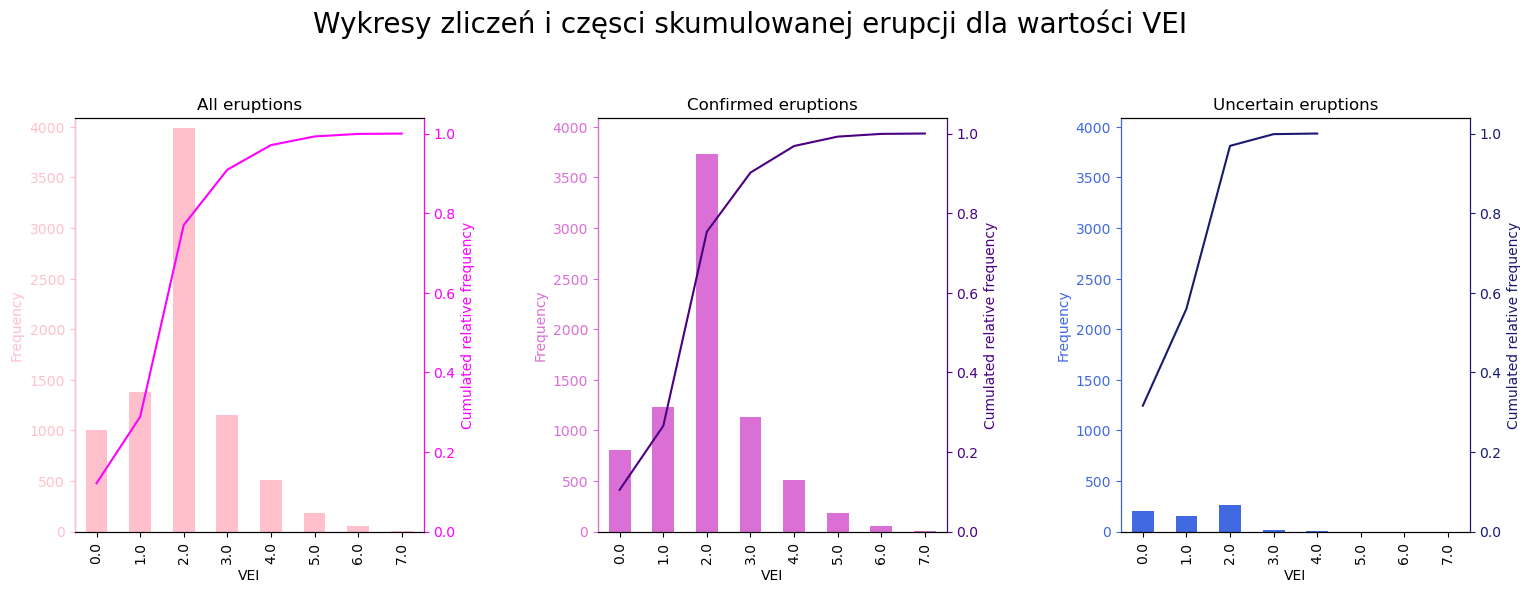

In [6]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
fig.suptitle('Wykresy zliczeń i częsci skumulowanej erupcji dla wartości VEI',fontsize=20)
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(top=0.8)
max_y=vei_data['All eruptions']['f'].max() + 100

ax[0].set_title('All eruptions')
vei_data['All eruptions']['f'].plot(kind='bar',ax=ax[0],color='pink')
ax[0].set_xlim([-0.5,7.5])
ax[0].set_xlabel('VEI')
ax[0].set_ylim(0,max_y)
ax[0].set_ylabel('Frequency', color='pink')
ax[0].tick_params(axis='y', colors='pink')
ax[0] = ax[0].twinx()
ax[0].plot(vei_data['All eruptions'].index,vei_data['All eruptions']['crf'],color='magenta')
ax[0].set_ylim([0,1.04])
ax[0].set_ylabel('Cumulated relative frequency',color='magenta')
ax[0].tick_params(axis='y', colors='magenta')
ax[0].spines['left'].set_color('pink')
ax[0].spines['right'].set_color('magenta')

ax[1].set_title('Confirmed eruptions')
vei_data['Confirmed Eruptions']['f'].plot(kind='bar',ax=ax[1],color='orchid')
ax[1].set_xlim([-0.5,7.5])
ax[1].set_xlabel('VEI')
ax[1].set_ylim(0,max_y)
ax[1].set_ylabel('Frequency', color='orchid')
ax[1].tick_params(axis='y', colors='orchid')
ax[1] = ax[1].twinx()
ax[1].plot(vei_data['Confirmed Eruptions'].index,vei_data['Confirmed Eruptions']['crf'],color='indigo')
ax[1].set_ylim([0,1.04])
ax[1].set_ylabel('Cumulated relative frequency',color='indigo')
ax[1].tick_params(axis='y', colors='indigo')
ax[1].spines['left'].set_color('orchid')
ax[1].spines['right'].set_color('indigo')

ax[2].set_title('Uncertain eruptions')
vei_data['Uncertain Eruptions']['f'].plot(kind='bar',ax=ax[2],color='royalblue')
ax[2].set_xlim([-0.5,7.5])
ax[2].set_xlabel('VEI')
ax[2].set_ylim(0,max_y)
ax[2].set_ylabel('Frequency', color='royalblue')
ax[2].tick_params(axis='y', colors='royalblue')
ax[2] = ax[2].twinx()
ax[2].plot(vei_data['Uncertain Eruptions'].index,vei_data['Uncertain Eruptions']['crf'],color='midnightblue')
ax[2].set_ylim([0,1.04])
ax[2].set_ylabel('Cumulated relative frequency',color='midnightblue')
ax[2].tick_params(axis='y', colors='midnightblue')
ax[2].spines['left'].set_color('royalblue')
ax[2].spines['right'].set_color('midnightblue')


### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

> Indeks: 2-poziomowe nagłówki </br>

>> Nagłówki 1 poziomu: Kategorie dowodów </br>

>> Nagłówki 2 poziomu: Metody, które dostarczyły dowodów </br>

> Kolumny: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [41]:
eruptions_data['VEI']=eruptions_data['VEI'].astype('int')
evidence_data = eruptions_data.pivot_table(index=['Evidence Type', 'Evidence Method'],
                                           columns='VEI',values='Volcano Name',aggfunc='count',fill_value=0)
evidence_data['All'] = evidence_data.sum(axis=1)
evidence_data=evidence_data.sort_values(by='All',ascending=False)
evidence_type_sums = evidence_data.groupby('Evidence Type')['All'].sum()
sorted_evidence_types = evidence_type_sums.sort_values(ascending=False).index
evidence_data = evidence_data.loc[sorted_evidence_types]
evidence_data

VEI                                   0     1     2    3    4   5   6  7   All
Evidence Type Evidence Method                                                 
Observations  Reported              376  1200  3430  837  194  42   7  1  6087
              Hydrophonic            68     3     0    0    0   0   0  0    71
              Seismicity             15     0     1    0    0   0   0  0    16
              Satellite (visual)      0     2     3    1    0   0   0  0     6
              Satellite (infrared)    1     0     1    1    0   0   0  0     3
              Photo / Video           1     1     1    0    0   0   0  0     3
              Aviation                0     1     0    0    0   0   0  0     1
Isotopic      14C (calibrated)       41    12    49  100  105  70  21  3   401
              14C (uncalibrated)    125     7    34   54   91  41  19  1   372
              Uranium-series         24     0     0    0    0   0   0  0    24
              Cosmic Ray Exposure    20     1     0    0    1   0   0  0    22
              Ar/Ar                  12     1     0    0    1   1   0  0    15
              K/Ar                   10     0     0    1    0   0   0  0    11
Uncertain     Unspecified           204   138   271   22    1   0   0  0   636
Correlation   Tephrochronology       71    16   122  124  103  22   5  0   463
              Magnetism              34     0     5    0    2   0   0  0    41
              Anthropology            4     1     5    2    6   1   0  0    19
Sidereal      Varve Count             0     1    66    8    1   0   0  0    76
              Ice Core                0     0     3    0    3   0   1  2     9
              Dendrochronology        0     0     0    1    2   3   0  0     6
Radiogenic    Thermoluminescence      1     0     0    0    1   0   0  0     2
              Fission track           0     0     0    1    0   0   0  0     1

In [42]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

C:\Users\zuzan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zuzan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zuzan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zuzan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0, 0.5, 'Start Year')

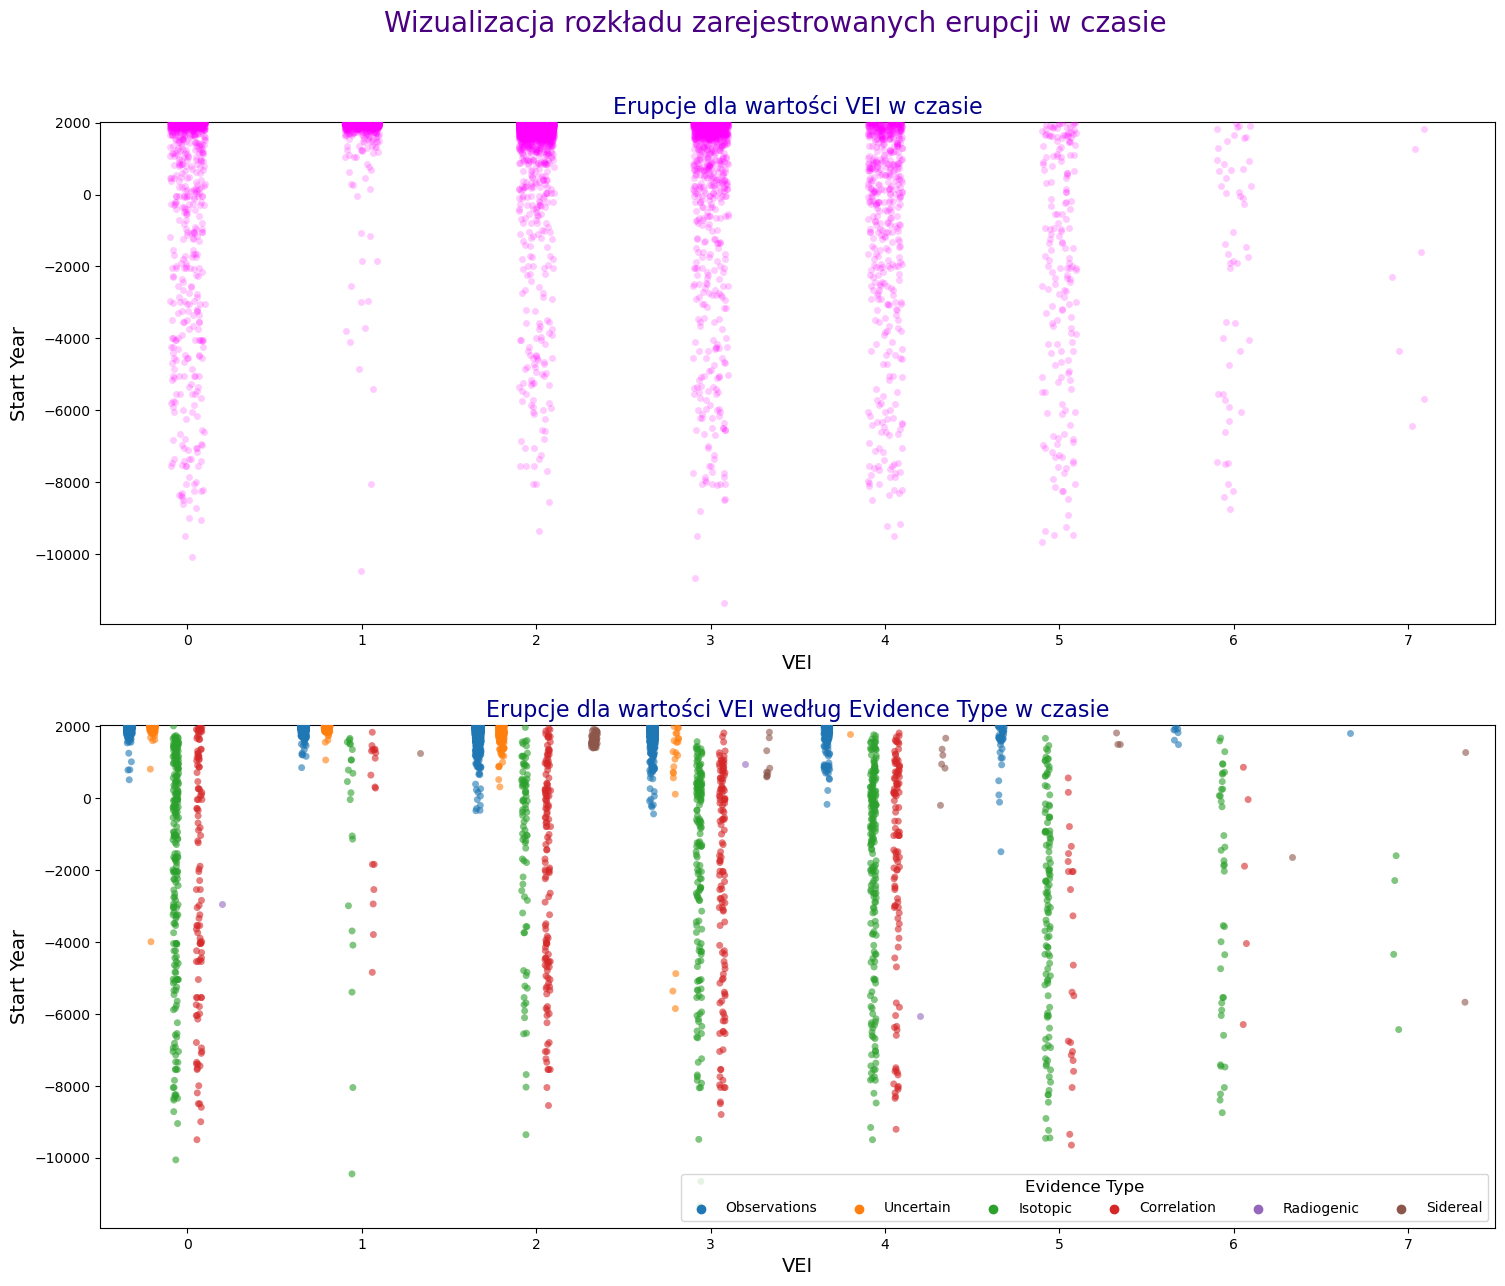

In [45]:
fig,ax=plt.subplots(2,1,figsize=(18,14))
max_y=eruptions_data['Start Year'].max()
min_y=eruptions_data['Start Year'].min()-600
plt.suptitle('Wizualizacja rozkładu zarejestrowanych erupcji w czasie',fontsize=20,color='indigo')
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(top=0.9)

sns.stripplot(data=eruptions_data, x="VEI", y="Start Year",ax=ax[0],alpha=0.2,size=5,color='magenta')
ax[0].set_ylim(min_y,max_y)
ax[0].set_xlim(-0.5,7.5)
ax[0].set_title('Erupcje dla wartości VEI w czasie', fontsize=16,color='darkblue')
ax[0].set_xlabel('VEI', fontsize=14)
ax[0].set_ylabel('Start Year', fontsize=14)

sns.stripplot(data=eruptions_data, x="VEI", y="Start Year", hue="Evidence Type",ax=ax[1],size=5,dodge=True,alpha=0.6)
ax[1].set_ylim(min_y,max_y)
ax[1].set_xlim(-0.5,7.5)
legend = ax[1].legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=6, title='Evidence Type')  # Przenieś legendę na prawy dolny róg
legend.get_title().set_fontsize('12')
ax[1].set_title('Erupcje dla wartości VEI według Evidence Type w czasie', fontsize=16,color='darkblue')
ax[1].set_xlabel('VEI', fontsize=14)
ax[1].set_ylabel('Start Year', fontsize=14)